# Análise de sentimentos do Twitter com dados extraidor do dataset anotado tweetSentBR

O trabalho será realizando apenas com os dados balanaceados (undersampling)

### Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando os dados para treinamento do modelo

In [2]:
# carregando dataset
tweets_df = pd.read_csv('')

In [3]:
tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,1,test,que coisa linda O programa estava mostrando um...,False
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,1,test,por mais com as irmãs galvão adorei elas,False
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,1,test,mr CATRA USERNAME lançando sua nova música PPK...,False
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,0,test,quem viu aquela lutadora modela barbuda tatuad...,False
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,-1,test,tô passada com esse cara quanta merda pode sai...,False


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15047 entries, 0 to 15046
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         15047 non-null  int64 
 1   hashtag    15047 non-null  object
 2   votes      15047 non-null  object
 3   hard       15047 non-null  int64 
 4   sentiment  15047 non-null  object
 5   group      15047 non-null  object
 6   text       15047 non-null  object
 7   repeat     15047 non-null  bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 837.7+ KB


In [5]:
tweets_df.groupby(['sentiment']).count()

,id,hashtag,votes,hard,group,text,repeat
sentiment,,,,,,,
-,47,47,47,47,47,47,47
-1,4426,4426,4426,4426,4426,4426,4426
0,3926,3926,3926,3926,3926,3926,3926
1,6648,6648,6648,6648,6648,6648,6648


Como podemos observar, os dados estão desbalanceados e com algumas linhas apresentando a variável sentimento com o caracter traço '-'.

Para melhor trabalharmos com os dados, foi decidida a remoção dessas linhas.

In [6]:
# removendo as linhas com a variável sentimento como traço '-'

indexNames = tweets_df[ tweets_df['sentiment'] == '-' ].index #obtendo o valor para ajudar a remover a linha
tweets_df.drop(indexNames , inplace=True) #removendo a linha correspondente ao valor informado

In [7]:
# tranformando valores para adequar a os classificadores
tweets_df['sentiment'] = tweets_df['sentiment'].replace(['-1', '0', '1'], [3, 6, 9])
tweets_df['sentiment'] = tweets_df['sentiment'].replace([3, 6, 9], [0, 1, 2])

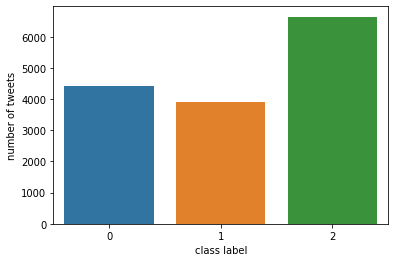

In [8]:
# Visualizando os dados graficamente
sns.countplot(x=tweets_df.sentiment)
plt.xlabel('class label')
plt.ylabel('number of tweets')
plt.show()

In [9]:
tweets_df.groupby(['sentiment']).count()

,id,hashtag,votes,hard,group,text,repeat
sentiment,,,,,,,
0,4426,4426,4426,4426,4426,4426,4426
1,3926,3926,3926,3926,3926,3926,3926
2,6648,6648,6648,6648,6648,6648,6648


## Efetuando a limpeza dos dados

In [10]:
# removendo as palavras USERNAME e NUMBER
tweets_df['text_clean'] = tweets_df['text'].str.replace('USERNAME', '').str.replace('NUMBER', '')

In [11]:
!python -m nltk.downloader stopwords

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
# importando a biblioteca de processamento de linguagen natural e a de expreções regulares (regex)
import nltk
import re

# usando as funções stopword e remover os caracteres indesejados
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower() # remove url e tranforma o texto em minusculo
    instancia = re.sub(r'[0-9]+', '', instancia) # remove números
    instancia = re.sub(r'[^\w\s]','', instancia) # remove pontuação
    instancia = re.sub('[!#$%^&*()]', '', instancia) #remove caractéres espaciais
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [13]:
# remover emojis utilizado regex (re)
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [14]:
# aplicando a função de limpeza de dados:
tweets_df['text_clean'] = [Preprocessing(i) for i in tweets_df['text_clean']]
tweets_df['text_clean'] = [remove_emoji(i) for i in tweets_df['text_clean']]
pd.set_option('display.max_colwidth', None) 

tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat,text_clean
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,False,coisa linda programa mostrando familia adotou adolescente anos amor
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,por mais com as irmãs galvão adorei elas,False,irmãs galvão adorei
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,2,test,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,False,mr catra lançando nova música ppk chora k k k mrcatra ppkchora
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,1,test,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,False,viu lutadora modela barbuda tatuada masterchefbr
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,0,test,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,False,tô passada cara quanta merda pode sair boca alguém alguns minutos


# Lematização

In [15]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download pt_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 4.1 MB/s 
     |████████████████████████████████| 1.2 MB 29.9 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.9/821.9 kB 55.2 MB/s eta 0:00:00
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.17
    Uninstalling thinc-8.0.17:
      Successfully uninstalled thinc-8.0.17
  Attempting uninstall: spacy
    Found existing installation: spacy 3.3.1
    Uninstalling spacy-3.3.1:
      Successfully uninstalled spacy-3.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.3.0 requires spacy<3.4.0,>=3.3.0.dev0, but you have spacy 3.4.0 which is incompatible.
2022-07-13 16:32:28.369190: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
L

In [16]:
import spacy
nlp = spacy.load('pt_core_news_sm')

In [17]:
tweets_df['text_lemma'] = tweets_df['text_clean'].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))

In [18]:
tweets_df['text_lemma'] = [Preprocessing(i) for i in tweets_df['text_lemma']]
tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat,text_clean,text_lemma
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,False,coisa linda programa mostrando familia adotou adolescente anos amor,coisa lindo programa mostrar familia adotar adolescente ano amor
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,por mais com as irmãs galvão adorei elas,False,irmãs galvão adorei,irmã galvão ador
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,2,test,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,False,mr catra lançando nova música ppk chora k k k mrcatra ppkchora,mr catra lançar novo música ppk chorar k k k mrcatra ppkchora
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,1,test,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,False,viu lutadora modela barbuda tatuada masterchefbr,ver lutadora modelar barbuda tatuar masterchefbr
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,0,test,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,False,tô passada cara quanta merda pode sair boca alguém alguns minutos,tô passado cara quanto merdo poder sair boca alguém algum minuto


## Lematização (outra forma)

In [19]:
!pip install simplemma

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 MB 9.2 MB/s eta 0:00:00


In [20]:
import simplemma
from simplemma import text_lemmatizer

In [21]:
# teste
teste_lemma = text_lemmatizer('Sou o intervalo entre o que desejo ser e os outros me fizeram.', lang='pt')
teste_lemma

['ser',
 'o',
 'intervalo',
 'entre',
 'o',
 'que',
 'desejo',
 'ser',
 'e',
 'o',
 'outro',
 'me',
 'fazer',
 '.']

In [22]:
tweets_df['text_lemma_2'] = [text_lemmatizer(linha, lang='pt') for linha in tweets_df['text_clean']] #lematizando o texto
tweets_df['text_lemma_2'] = [' '.join(palavra) for palavra in tweets_df['text_lemma_2']] #juntando o texto novamente
tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat,text_clean,text_lemma,text_lemma_2
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,False,coisa linda programa mostrando familia adotou adolescente anos amor,coisa lindo programa mostrar familia adotar adolescente ano amor,coisar lindar programar mostrar familia adotar adolescente ano amor
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,por mais com as irmãs galvão adorei elas,False,irmãs galvão adorei,irmã galvão ador,irmão galvão adorar
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,2,test,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,False,mr catra lançando nova música ppk chora k k k mrcatra ppkchora,mr catra lançar novo música ppk chorar k k k mrcatra ppkchora,mr catra lançar novo músico ppk chorar k k k mrcatra ppkchora
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,1,test,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,False,viu lutadora modela barbuda tatuada masterchefbr,ver lutadora modelar barbuda tatuar masterchefbr,ver lutador modelar barbudo tatuado masterchefbr
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,0,test,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,False,tô passada cara quanta merda pode sair boca alguém alguns minutos,tô passado cara quanto merdo poder sair boca alguém algum minuto,tô passado caro quanto merda poder sair bocar alguém algum minuto


## Trabalhando no equilibrio dos dados

### Iniciando o trabalho de balanceamento dos dados

In [23]:
minoria = tweets_df.loc[tweets_df['sentiment'] == 0]
meio = tweets_df.loc[tweets_df['sentiment'] == 1]
maioria = tweets_df.loc[tweets_df['sentiment'] == 2]

In [24]:
print('Maioria \n{}\n'.format(maioria['sentiment'].count()))
print('Meio \n{}\n'.format(meio['sentiment'].count()))
print('Minoria \n{}'.format(minoria['sentiment'].count()))

Maioria 
6648

Meio 
3926

Minoria 
4426


## Igualar a quantidade de tweets entre positivo, negativo e neutro

### Undersampling (Criando datasets reorganizados para minoria)

In [25]:
from sklearn.utils import resample

maior_menor = resample(maioria, replace=True, n_samples=len(minoria), random_state=123)
meio_menor = resample(meio, replace=True, n_samples=len(minoria), random_state=123)

In [26]:
print(minoria.count(), meio_menor.count(), maior_menor.count())

id              4426
hashtag         4426
votes           4426
hard            4426
sentiment       4426
group           4426
text            4426
repeat          4426
text_clean      4426
text_lemma      4426
text_lemma_2    4426
dtype: int64 id              4426
hashtag         4426
votes           4426
hard            4426
sentiment       4426
group           4426
text            4426
repeat          4426
text_clean      4426
text_lemma      4426
text_lemma_2    4426
dtype: int64 id              4426
hashtag         4426
votes           4426
hard            4426
sentiment       4426
group           4426
text            4426
repeat          4426
text_clean      4426
text_lemma      4426
text_lemma_2    4426
dtype: int64


In [27]:
# juntando os dataframes
tweets_df_equilibrado_menor = pd.concat([minoria, meio_menor, maior_menor])

# resetando o index
tweets_df_equilibrado_menor = tweets_df_equilibrado_menor.reset_index()

# removendo as colunas Unnamed: 0 e index
tweets_df_equilibrado_menor.drop(columns=['index'], inplace=True)

In [28]:
tweets_df_equilibrado_menor.groupby(['sentiment']).count()

,id,hashtag,votes,hard,group,text,repeat,text_clean,text_lemma,text_lemma_2
sentiment,,,,,,,,,,
0,4426,4426,4426,4426,4426,4426,4426,4426,4426,4426
1,4426,4426,4426,4426,4426,4426,4426,4426,4426,4426
2,4426,4426,4426,4426,4426,4426,4426,4426,4426,4426


# Machine Learning - Utils

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Vetorizadores
from sklearn.feature_extraction.text import CountVectorizer

# Classificadores
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_predict

In [30]:
# Tokenização especial para tweets
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer()

In [31]:
# função para escolher os pipelines dos modelos a serem treinados
def escolher_pipeline(pipe):
    
    if(pipe == 1):
        modelo_sgd_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SGDClassifier(alpha=0.0001,
                                     loss='modified_huber', 
                                     penalty ='l2'))
        ])
        return modelo_sgd_tfidf
    
    elif(pipe == 2):
        modelo_nb_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', MultinomialNB(alpha=0.1))
        ])
        return modelo_nb_tfidf
    
    elif(pipe == 3):
        modelo_rf_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', RandomForestClassifier(n_estimators=10))
        ])
        return modelo_rf_tfidf
    
    elif(pipe == 4):
        modelo_knn_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', KNeighborsClassifier(metric='euclidean', 
                                            n_neighbors=1, 
                                            weights='uniform'))
        ])
        return modelo_knn_tfidf
    
    elif(pipe == 5):
        modelo_pa_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', PassiveAggressiveClassifier(C= 0.03, 
                                                   loss= 'squared_hinge'))
        ])
        return modelo_pa_tfidf
    
    elif(pipe == 6):
        modelo_gb_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', GradientBoostingClassifier(criterion='friedman_mse', 
                                                  learning_rate=0.2, 
                                                  max_depth=8, 
                                                  max_features='sqrt', 
                                                  n_estimators=10))
        ])
        return modelo_gb_tfidf
    
    elif(pipe == 7):
        modelo_xgb_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', xgb.XGBClassifier(learning_rate=0.5, 
                                         max_depth=4, 
                                         objective='binary=hinge'))
        ])
        return modelo_xgb_tfidf
    
    elif(pipe == 8):
        modelo_mlp_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', MLPClassifier(activation='relu', 
                                     alpha=0.05, 
                                     hidden_layer_sizes=(50, 100, 50), 
                                     learning_rate='constant', 
                                     solver='adam'))
        ])
        return modelo_mlp_tfidf
    
    elif(pipe == 9):
        modelo_lr_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', LogisticRegression(C= 100.0, 
                                          penalty= 'l2'))
        ])
        return modelo_lr_tfidf
    
    elif(pipe == 10):
        modelo_svc_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SVC(C=10, 
                           gamma=1, 
                           kernel='rbf'))
        ])
        return modelo_svc_tfidf

In [32]:
!pip install confplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import confplot

# função que exibe a matrix de confusão para avalização do modelo
def matriz_confusao(y_test, modelo_predicao):
    
    # imprimir relatório de classificação
    print("Relatório de Classificação:\n", 
            metrics.classification_report(y_test, modelo_predicao))
    
    # imprimir a acurácia do modelo
    print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, modelo_predicao)))
    
    # imprimir a matrix de confusão
    print("Matrix de confusão:\n", pd.crosstab(y_test, modelo_predicao, 
                                                rownames=['Real'], 
                                                colnames=['Predito'], 
                                                margins=True),  '')
    
    # plotar a matrix de confusão
    cm = confusion_matrix(y_target = y_test, 
                            y_predicted = modelo_predicao, binary=False)
    fig, ax = plot_confusion_matrix(conf_mat = cm)
    plt.show()
    print('\n')
    
    # plotar a matrix de confusão (mais completo)
    y_true = y_test
    y_pred = modelo_predicao
    columns = ['negativo', 'neutro', 'positivo']
    confplot.plot_confusion_matrix_from_data(y_true, y_pred, columns)

# Machine Learning - Construindo modelo com dados Undersampling

In [34]:
X = tweets_df_equilibrado_menor['text_lemma_2']
y = tweets_df_equilibrado_menor['sentiment']

In [35]:
X.shape, y.shape

((13278,), (13278,))

### Separando dados para o treino e para o teste

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9958,), (9958,), (3320,), (3320,))

## Modelo 1 (CountVectorizer e SGDClassifier)

In [37]:
modelo1_orig = escolher_pipeline(1)
modelo1_orig = modelo1_orig.fit(X_train, y_train)
modelo1_pred_orig = modelo1_orig.predict(X_test)

In [38]:
modelo1_pred_orig

array([1, 0, 1, ..., 1, 2, 2])

### Avaliando o modelo 1

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.71      0.62      0.66      1113
           1       0.64      0.72      0.68      1091
           2       0.73      0.73      0.73      1116

    accuracy                           0.69      3320
   macro avg       0.69      0.69      0.69      3320
weighted avg       0.69      0.69      0.69      3320

Acurácia: 0.6913

Matrix de confusão:
 Predito    0     1     2   All
Real                          
0        690   263   160  1113
1        163   785   143  1091
2        117   179   820  1116
All      970  1227  1123  3320 


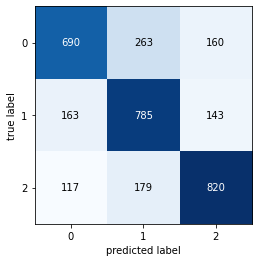

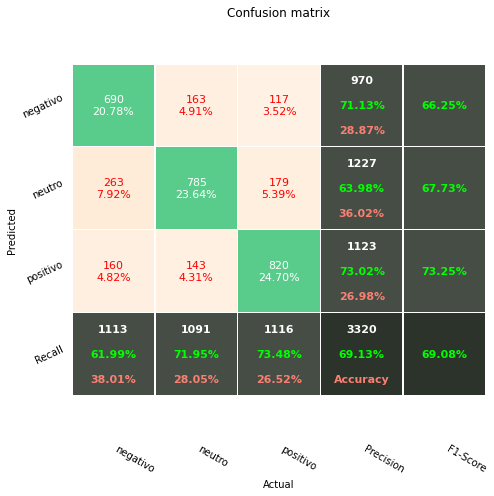

In [39]:
matriz_confusao(y_test, modelo1_pred_orig)

### Validação cruzada - modelo 1

In [40]:
validacao_cruzada1 = cross_val_predict(modelo1_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.66      0.70      4426
           1       0.68      0.75      0.71      4426
           2       0.76      0.76      0.76      4426

    accuracy                           0.72     13278
   macro avg       0.73      0.72      0.72     13278
weighted avg       0.73      0.72      0.72     13278

Acurácia: 0.7229

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2907   944   575   4426
1         606  3316   504   4426
2         406   644  3376   4426
All      3919  4904  4455  13278 


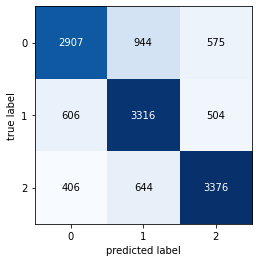

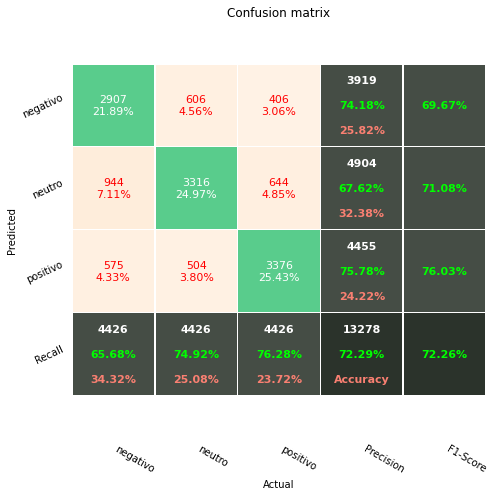

In [41]:
matriz_confusao(y, validacao_cruzada1)

## Modelo 2 (CountVectorizer e MultinomialNB)

In [42]:
modelo2_orig = escolher_pipeline(2)
modelo2_orig = modelo2_orig.fit(X_train, y_train)
modelo2_pred_orig = modelo2_orig.predict(X_test)

In [43]:
modelo2_pred_orig

array([1, 1, 1, ..., 1, 2, 2])

### Avaliando o modelo 2

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.66      0.68      0.67      1113
           1       0.65      0.60      0.63      1091
           2       0.70      0.73      0.71      1116

    accuracy                           0.67      3320
   macro avg       0.67      0.67      0.67      3320
weighted avg       0.67      0.67      0.67      3320

Acurácia: 0.6711

Matrix de confusão:
 Predito     0    1     2   All
Real                          
0         759  192   162  1113
1         249  654   188  1091
2         148  153   815  1116
All      1156  999  1165  3320 


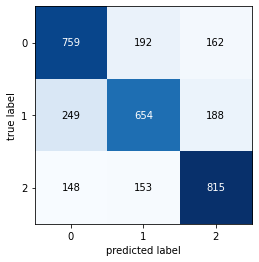

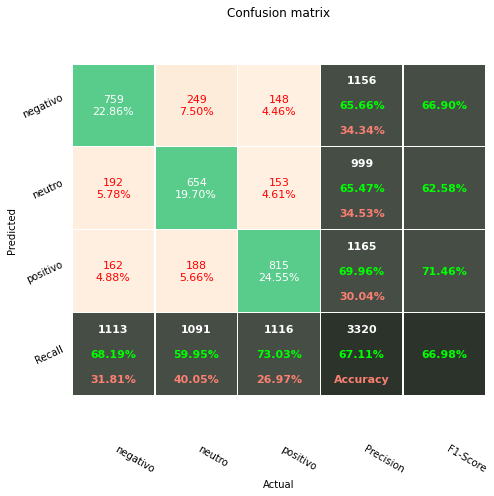

In [44]:
matriz_confusao(y_test, modelo2_pred_orig)

### Validação cruzada - modelo 2

In [45]:
validacao_cruzada2 = cross_val_predict(modelo2_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.67      0.70      0.69      4426
           1       0.68      0.61      0.64      4426
           2       0.70      0.75      0.73      4426

    accuracy                           0.69     13278
   macro avg       0.69      0.69      0.69     13278
weighted avg       0.69      0.69      0.69     13278

Acurácia: 0.6865

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        3114   731   581   4426
1         925  2681   820   4426
2         580   526  3320   4426
All      4619  3938  4721  13278 


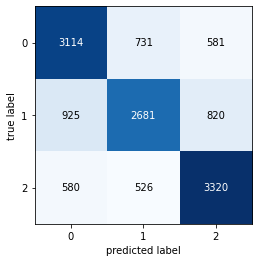

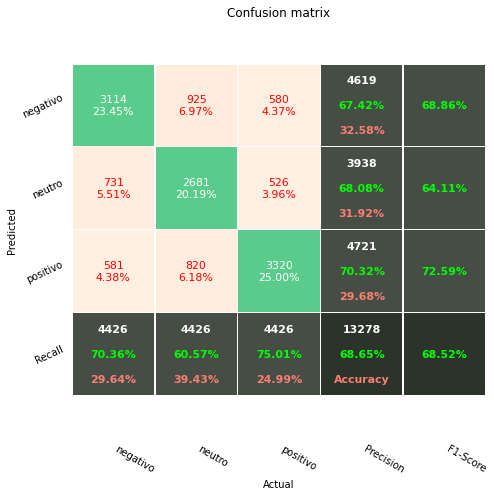

In [46]:
matriz_confusao(y, validacao_cruzada2)

## Modelo 3 (CountVectorizer e RandomForestClassifier)

In [47]:
modelo3_orig = escolher_pipeline(3)
modelo3_orig = modelo3_orig.fit(X_train, y_train)
modelo3_pred_orig = modelo3_orig.predict(X_test)

In [48]:
modelo3_pred_orig

array([1, 0, 1, ..., 1, 2, 2])

### Avaliando o modelo 3

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.71      0.63      0.67      1113
           1       0.65      0.77      0.70      1091
           2       0.76      0.71      0.74      1116

    accuracy                           0.70      3320
   macro avg       0.71      0.70      0.70      3320
weighted avg       0.71      0.70      0.70      3320

Acurácia: 0.7042

Matrix de confusão:
 Predito    0     1     2   All
Real                          
0        705   262   146  1113
1        154   837   100  1091
2        135   185   796  1116
All      994  1284  1042  3320 


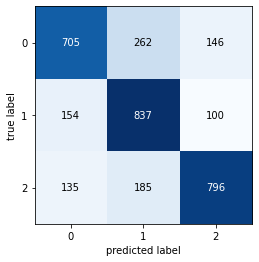

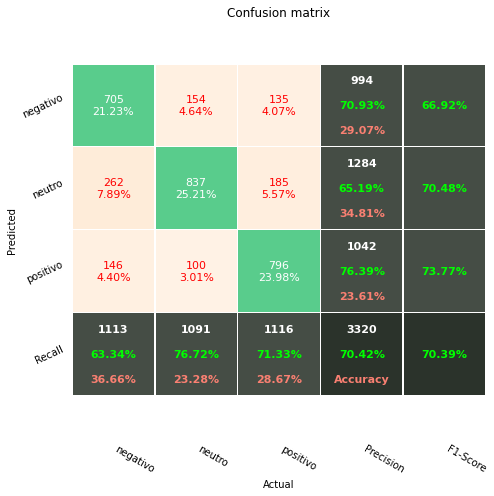

In [49]:
matriz_confusao(y_test, modelo3_pred_orig)

### Validação cruzada - modelo 3

In [50]:
validacao_cruzada3 = cross_val_predict(modelo3_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.73      0.65      0.69      4426
           1       0.68      0.81      0.74      4426
           2       0.80      0.74      0.77      4426

    accuracy                           0.73     13278
   macro avg       0.74      0.73      0.73     13278
weighted avg       0.74      0.73      0.73     13278

Acurácia: 0.7336

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2888  1030   508   4426
1         549  3567   310   4426
2         515   625  3286   4426
All      3952  5222  4104  13278 


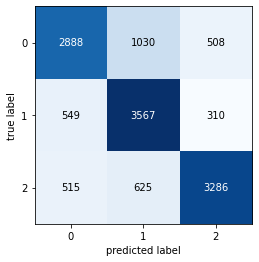

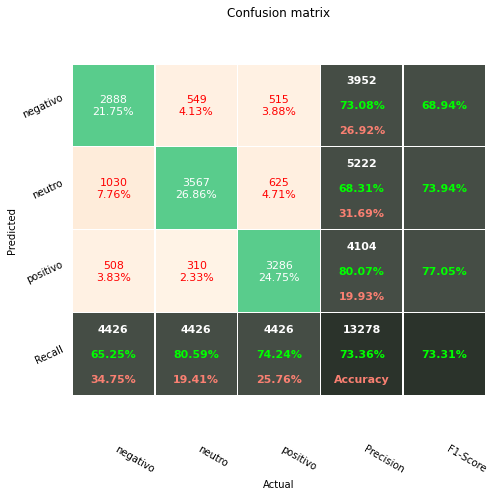

In [51]:
matriz_confusao(y, validacao_cruzada3)

## Modelo 4 (CountVectorizer e KNeighborsClassifier)

In [52]:
modelo4_orig = escolher_pipeline(4)
modelo4_orig = modelo4_orig.fit(X_train, y_train)
modelo4_pred_orig = modelo4_orig.predict(X_test)

In [53]:
modelo4_pred_orig

array([1, 1, 1, ..., 1, 2, 2])

### Avaliando o modelo 4

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.69      0.30      0.42      1113
           1       0.53      0.83      0.65      1091
           2       0.66      0.68      0.67      1116

    accuracy                           0.60      3320
   macro avg       0.63      0.60      0.58      3320
weighted avg       0.63      0.60      0.58      3320

Acurácia: 0.6000

Matrix de confusão:
 Predito    0     1     2   All
Real                          
0        334   507   272  1113
1         69   901   121  1091
2         81   278   757  1116
All      484  1686  1150  3320 


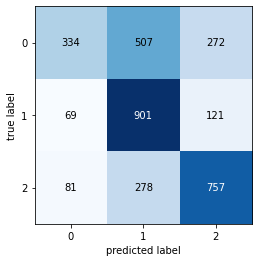

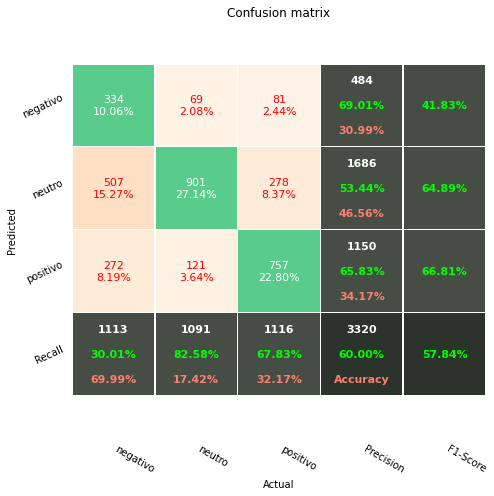

In [54]:
matriz_confusao(y_test, modelo4_pred_orig)

### Validação cruzada - modelo 4

In [55]:
validacao_cruzada4 = cross_val_predict(modelo4_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.62      0.70      0.65      4426
           1       0.67      0.74      0.70      4426
           2       0.82      0.62      0.70      4426

    accuracy                           0.69     13278
   macro avg       0.70      0.69      0.69     13278
weighted avg       0.70      0.69      0.69     13278

Acurácia: 0.6864

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        3094   915   417   4426
1         940  3284   202   4426
2         995   695  2736   4426
All      5029  4894  3355  13278 


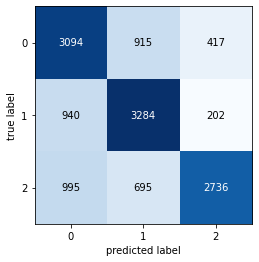

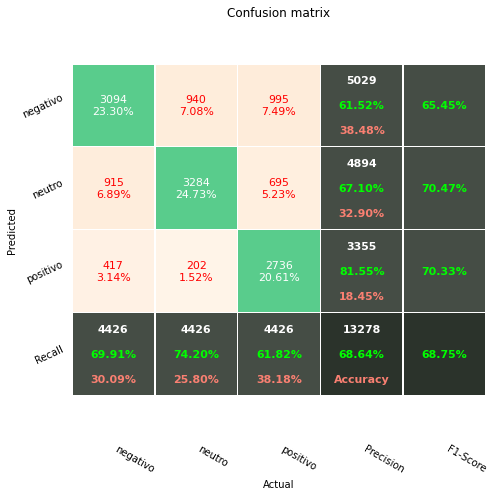

In [56]:
matriz_confusao(y, validacao_cruzada4)

## Modelo 5 (CountVectorizer e PassiveAggressiveClassifier)

In [57]:
modelo5_orig = escolher_pipeline(5)
modelo5_orig = modelo5_orig.fit(X_train, y_train)
modelo5_pred_orig = modelo5_orig.predict(X_test)

In [58]:
modelo5_pred_orig

array([1, 0, 1, ..., 1, 2, 2])

### Avaliando o modelo 5

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.71      0.61      0.65      1113
           1       0.64      0.71      0.68      1091
           2       0.71      0.74      0.73      1116

    accuracy                           0.69      3320
   macro avg       0.69      0.69      0.69      3320
weighted avg       0.69      0.69      0.69      3320

Acurácia: 0.6873

Matrix de confusão:
 Predito    0     1     2   All
Real                          
0        675   256   182  1113
1        162   779   150  1091
2        113   175   828  1116
All      950  1210  1160  3320 


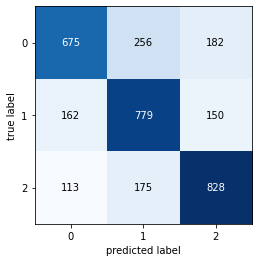

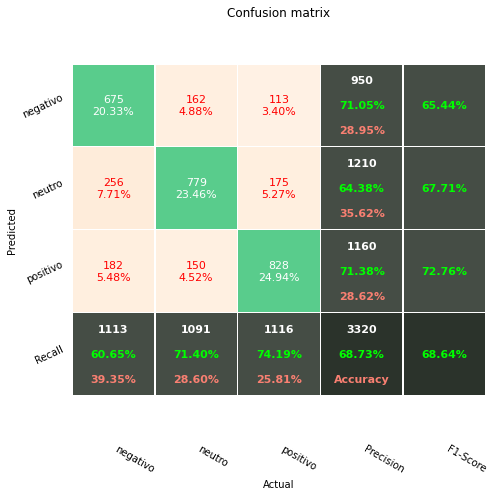

In [59]:
matriz_confusao(y_test, modelo5_pred_orig)

### Validação cruzada - modelo 5

In [60]:
validacao_cruzada5 = cross_val_predict(modelo5_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.75      0.64      0.69      4426
           1       0.67      0.77      0.72      4426
           2       0.75      0.76      0.76      4426

    accuracy                           0.72     13278
   macro avg       0.73      0.72      0.72     13278
weighted avg       0.73      0.72      0.72     13278

Acurácia: 0.7219

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2827   990   609   4426
1         545  3392   489   4426
2         412   648  3366   4426
All      3784  5030  4464  13278 


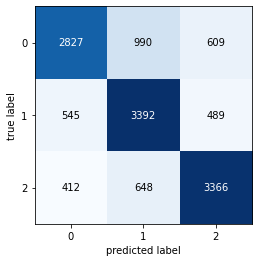

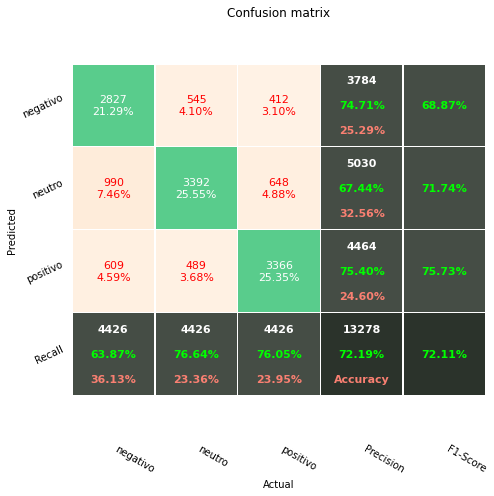

In [61]:
matriz_confusao(y, validacao_cruzada5)

## Modelo 6 (CountVectorizer e GradientBoostingClassifier)

In [62]:
modelo6_orig = escolher_pipeline(6)
modelo6_orig = modelo6_orig.fit(X_train, y_train)
modelo6_pred_orig = modelo6_orig.predict(X_test)

In [63]:
modelo6_pred_orig

array([1, 0, 2, ..., 1, 2, 1])

### Avaliando o modelo 6

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.59      0.51      0.54      1113
           1       0.48      0.65      0.55      1091
           2       0.66      0.50      0.57      1116

    accuracy                           0.55      3320
   macro avg       0.57      0.55      0.55      3320
weighted avg       0.57      0.55      0.55      3320

Acurácia: 0.5542

Matrix de confusão:
 Predito    0     1    2   All
Real                         
0        564   384  165  1113
1        247   714  130  1091
2        150   404  562  1116
All      961  1502  857  3320 


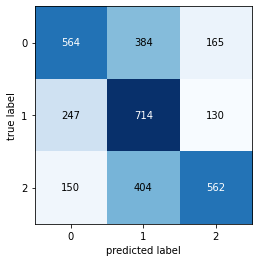

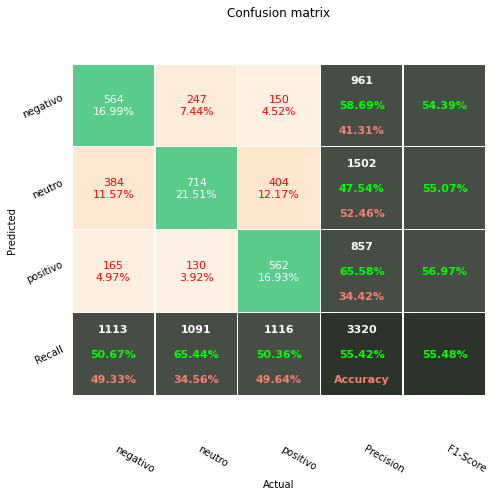

In [64]:
matriz_confusao(y_test, modelo6_pred_orig)

### Validação cruzada - modelo 6

In [65]:
validacao_cruzada6 = cross_val_predict(modelo6_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.60      0.47      0.53      4426
           1       0.46      0.66      0.54      4426
           2       0.62      0.49      0.55      4426

    accuracy                           0.54     13278
   macro avg       0.56      0.54      0.54     13278
weighted avg       0.56      0.54      0.54     13278

Acurácia: 0.5409

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2087  1679   660   4426
1         850  2933   643   4426
2         524  1740  2162   4426
All      3461  6352  3465  13278 


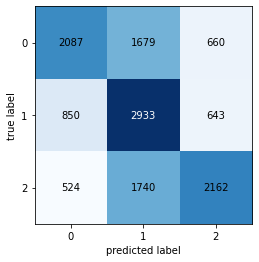

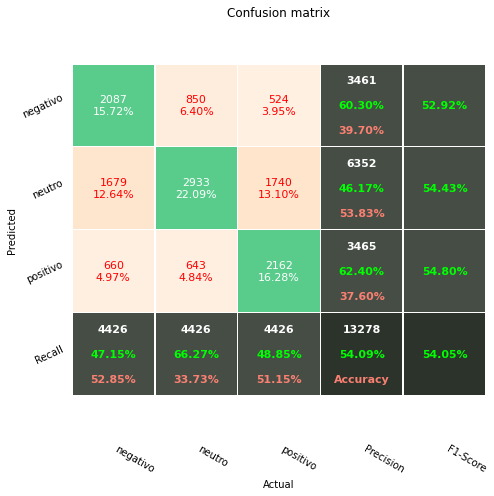

In [66]:
matriz_confusao(y, validacao_cruzada6)

## Modelo 7 (CountVectorizer e XGBClassifier)

In [67]:
modelo7_orig = escolher_pipeline(7)
modelo7_orig = modelo7_orig.fit(X_train, y_train)
modelo7_pred_orig = modelo7_orig.predict(X_test)

In [68]:
modelo7_pred_orig

array([1, 0, 1, ..., 1, 2, 0])

### Avaliando o modelo 7

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.68      0.56      0.61      1113
           1       0.53      0.73      0.61      1091
           2       0.73      0.60      0.66      1116

    accuracy                           0.63      3320
   macro avg       0.65      0.63      0.63      3320
weighted avg       0.65      0.63      0.63      3320

Acurácia: 0.6268

Matrix de confusão:
 Predito    0     1    2   All
Real                         
0        625   359  129  1113
1        182   791  118  1091
2        117   334  665  1116
All      924  1484  912  3320 


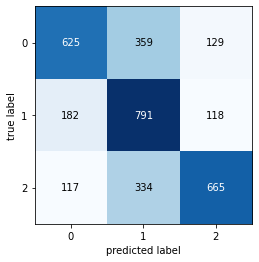

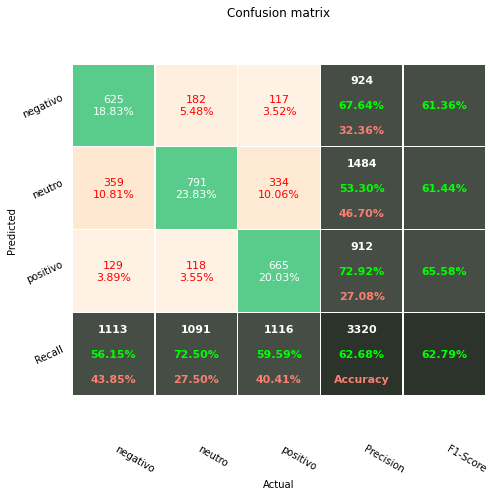

In [69]:
matriz_confusao(y_test, modelo7_pred_orig)

### Validação cruzada - modelo 7

In [70]:
validacao_cruzada7 = cross_val_predict(modelo7_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.69      0.58      0.63      4426
           1       0.55      0.75      0.63      4426
           2       0.76      0.60      0.67      4426

    accuracy                           0.65     13278
   macro avg       0.67      0.65      0.65     13278
weighted avg       0.67      0.65      0.65     13278

Acurácia: 0.6451

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2569  1428   429   4426
1         685  3321   420   4426
2         447  1304  2675   4426
All      3701  6053  3524  13278 


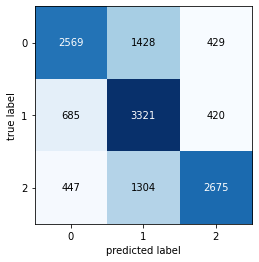

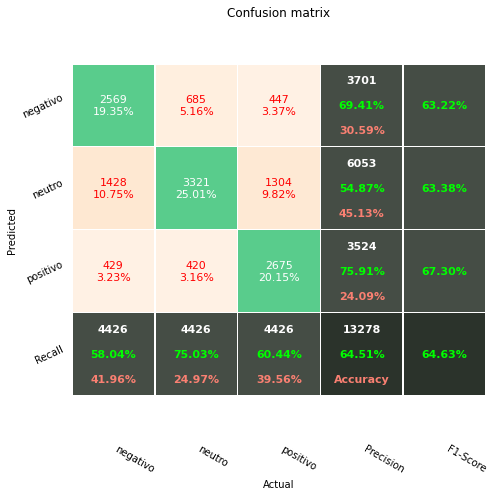

In [71]:
matriz_confusao(y, validacao_cruzada7)

## Modelo 8 (CountVectorizer e MLPClassifier)

In [72]:
modelo8_orig = escolher_pipeline(8)
modelo8_orig = modelo8_orig.fit(X_train, y_train)
modelo8_pred_orig = modelo8_orig.predict(X_test)

In [73]:
modelo8_pred_orig

array([1, 0, 1, ..., 0, 2, 1])

### Avaliando o modelo 8

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.73      0.63      0.68      1113
           1       0.68      0.75      0.71      1091
           2       0.74      0.77      0.75      1116

    accuracy                           0.72      3320
   macro avg       0.72      0.72      0.71      3320
weighted avg       0.72      0.72      0.71      3320

Acurácia: 0.7157

Matrix de confusão:
 Predito    0     1     2   All
Real                          
0        705   233   175  1113
1        146   817   128  1091
2        115   147   854  1116
All      966  1197  1157  3320 


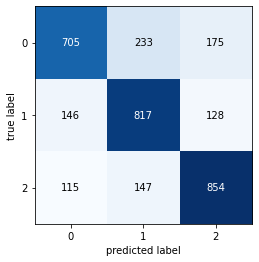

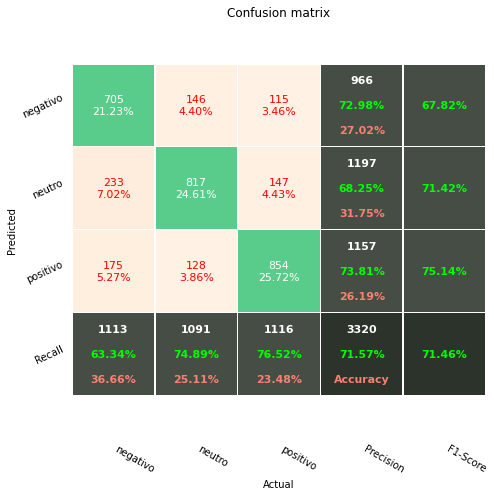

In [74]:
matriz_confusao(y_test, modelo8_pred_orig)

### Validação cruzada - modelo 8

In [75]:
validacao_cruzada8 = cross_val_predict(modelo8_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.76      0.66      0.71      4426
           1       0.71      0.80      0.75      4426
           2       0.77      0.79      0.78      4426

    accuracy                           0.75     13278
   macro avg       0.75      0.75      0.75     13278
weighted avg       0.75      0.75      0.75     13278

Acurácia: 0.7479

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2914   893   619   4426
1         491  3529   406   4426
2         409   529  3488   4426
All      3814  4951  4513  13278 


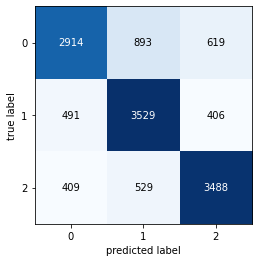

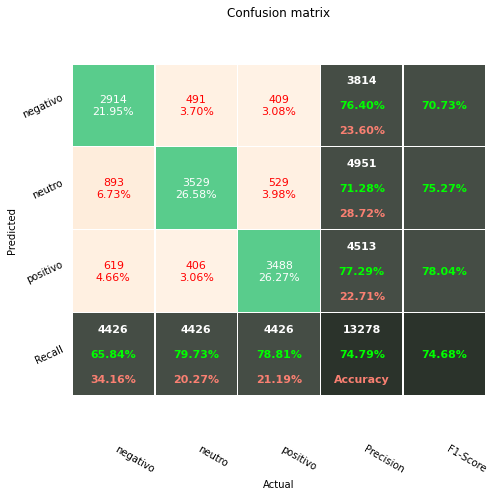

In [76]:
matriz_confusao(y, validacao_cruzada8)

## Modelo 9 (CountVectorizer e LogisticRegression)

In [77]:
modelo9_orig = escolher_pipeline(9)
modelo9_orig = modelo9_orig.fit(X_train, y_train)
modelo9_pred_orig = modelo9_orig.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [78]:
modelo9_pred_orig

array([1, 0, 1, ..., 1, 2, 2])

### Avaliando o modelo 9

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.71      0.61      0.66      1113
           1       0.65      0.73      0.68      1091
           2       0.73      0.75      0.74      1116

    accuracy                           0.70      3320
   macro avg       0.70      0.70      0.69      3320
weighted avg       0.70      0.70      0.69      3320

Acurácia: 0.6958

Matrix de confusão:
 Predito    0     1     2   All
Real                          
0        682   262   169  1113
1        163   793   135  1091
2        111   170   835  1116
All      956  1225  1139  3320 


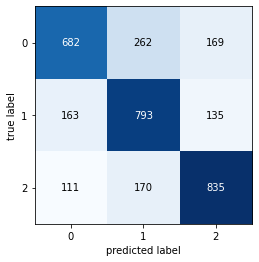

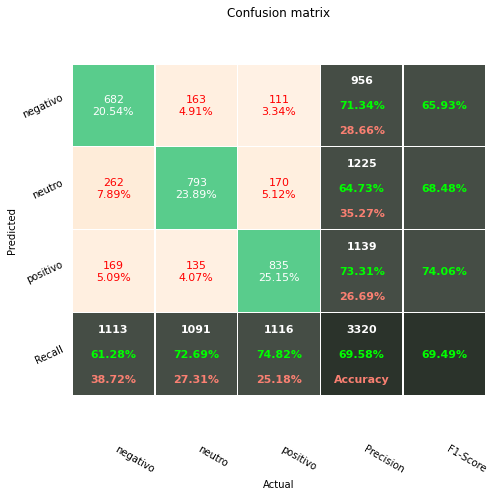

In [79]:
matriz_confusao(y_test, modelo9_pred_orig)

### Validação cruzada - modelo 9

In [80]:
validacao_cruzada9 = cross_val_predict(modelo9_orig, X, y, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.63      0.68      4426
           1       0.68      0.78      0.72      4426
           2       0.76      0.76      0.76      4426

    accuracy                           0.72     13278
   macro avg       0.73      0.72      0.72     13278
weighted avg       0.73      0.72      0.72     13278

Acurácia: 0.7235

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2807  1002   617   4426
1         536  3438   452   4426
2         431   634  3361   4426
All      3774  5074  4430  13278 


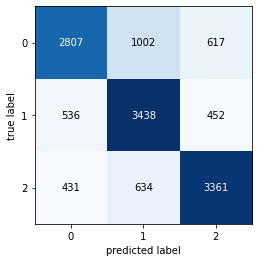

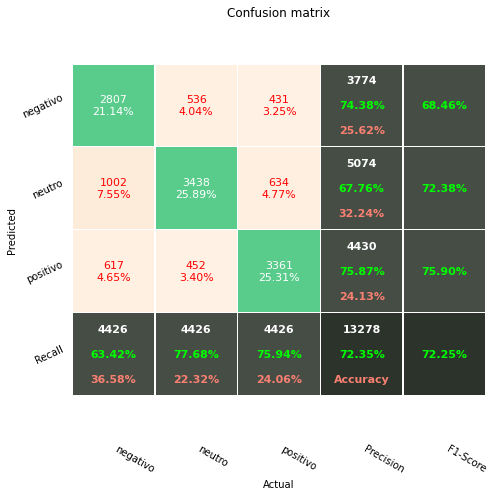

In [81]:
matriz_confusao(y, validacao_cruzada9)

## Modelo 10 (CountVectorizer e SVC)

In [82]:
modelo10_orig = escolher_pipeline(10)
modelo10_orig = modelo10_orig.fit(X_train, y_train)
modelo10_pred_orig = modelo10_orig.predict(X_test)

In [83]:
modelo10_pred_orig

array([1, 0, 1, ..., 0, 2, 0])

### Avaliando o modelo 10

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.55      0.93      0.69      1113
           1       0.88      0.62      0.73      1091
           2       0.89      0.52      0.66      1116

    accuracy                           0.69      3320
   macro avg       0.77      0.69      0.69      3320
weighted avg       0.77      0.69      0.69      3320

Acurácia: 0.6919

Matrix de confusão:
 Predito     0    1    2   All
Real                         
0        1039   47   27  1113
1         371  679   41  1091
2         487   50  579  1116
All      1897  776  647  3320 


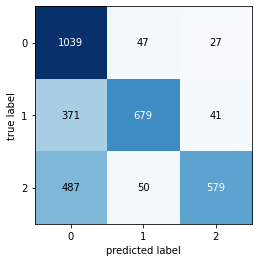

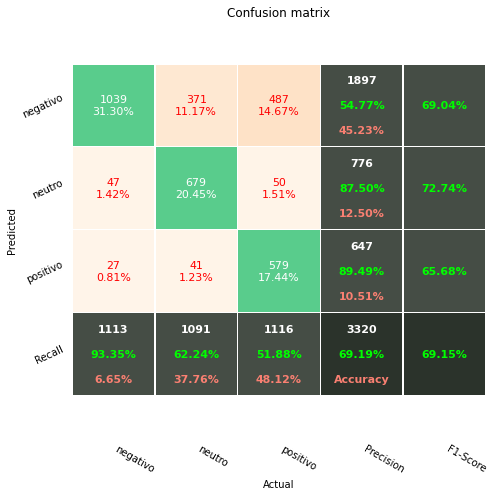

In [84]:
matriz_confusao(y_test, modelo10_pred_orig)

### Validação cruzada - modelo 10

In [85]:
validacao_cruzada10 = cross_val_predict(modelo10_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.58      0.95      0.72      4426
           1       0.91      0.69      0.78      4426
           2       0.93      0.55      0.69      4426

    accuracy                           0.73     13278
   macro avg       0.80      0.73      0.73     13278
weighted avg       0.80      0.73      0.73     13278

Acurácia: 0.7320

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        4206   140    80   4426
1        1254  3058   114   4426
2        1796   174  2456   4426
All      7256  3372  2650  13278 


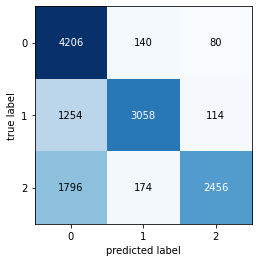

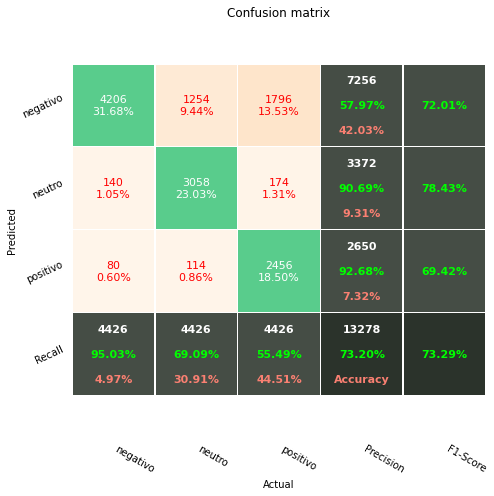

In [86]:
matriz_confusao(y, validacao_cruzada10)

## Gerando relatório dos modelos

In [87]:
# pegando o relatório de metricas dos modelos
report1 = metrics.classification_report(y_test, modelo1_pred_orig, output_dict=True)
report2 = metrics.classification_report(y_test, modelo2_pred_orig, output_dict=True)
report3 = metrics.classification_report(y_test, modelo3_pred_orig, output_dict=True)
report4 = metrics.classification_report(y_test, modelo4_pred_orig, output_dict=True)
report5 = metrics.classification_report(y_test, modelo5_pred_orig, output_dict=True)
report6 = metrics.classification_report(y_test, modelo6_pred_orig, output_dict=True)
report7 = metrics.classification_report(y_test, modelo7_pred_orig, output_dict=True)
report8 = metrics.classification_report(y_test, modelo8_pred_orig, output_dict=True)
report9 = metrics.classification_report(y_test, modelo9_pred_orig, output_dict=True)
report10 = metrics.classification_report(y_test, modelo10_pred_orig, output_dict=True)

In [88]:
# criando o dataframe para o relatório consolidado
columns = ['modelo', 'prec_neg', 'prec_neu', 'prec_pos', 'rec_neg', 'rec_neu', 'rec_pos', 'f1_neg', 'f1_neu', 'f1_pos', 'accuracy']
report_df = pd.DataFrame(columns=columns)

In [89]:
report_df

,modelo,prec_neg,prec_neu,prec_pos,rec_neg,rec_neu,rec_pos,f1_neg,f1_neu,f1_pos,accuracy


In [90]:
# criando a lista com o modelos de classificação
modelos = ['SGD_Count',
            'MultinomialNB_Count',
            'RandomForest_Count',
            'KNeighbors_Count',
            'PassiveAggressive_Count',
            'GradientBoosting_Count',
            'XGB_Count',
            'MLP_Count',
            'LogisticRegression_Count',
            'SVC_Count']

In [91]:
# criando a lista com os relatórios individuais
reports = [report1, 
            report2,
            report3,
            report4,
            report5,
            report6,
            report7,
            report8,
            report9,
            report10]

In [92]:
# loop para criação do relátorio consolidado
for i in range(len(modelos)):
    report_df.loc[i] = [modelos[i], 
                    round(reports[i]['0']['precision'], 2), 
                    round(reports[i]['1']['precision'], 2),
                    round(reports[i]['2']['precision'], 2),
                    round(reports[i]['0']['recall'], 2),
                    round(reports[i]['1']['recall'], 2),
                    round(reports[i]['2']['recall'], 2),
                    round(reports[i]['0']['f1-score'], 2),
                    round(reports[i]['1']['f1-score'], 2),
                    round(reports[i]['2']['f1-score'], 2),
                    round(reports[i]['accuracy'], 2)] 

In [96]:
report_df.sort_values(by='accuracy', ascending=False, inplace=True)
report_df

,modelo,prec_neg,prec_neu,prec_pos,rec_neg,rec_neu,rec_pos,f1_neg,f1_neu,f1_pos,accuracy
7,MLP_Count,0.73,0.68,0.74,0.63,0.75,0.77,0.68,0.71,0.75,0.72
2,RandomForest_Count,0.71,0.65,0.76,0.63,0.77,0.71,0.67,0.70,0.74,0.70
8,LogisticRegression_Count,0.71,0.65,0.73,0.61,0.73,0.75,0.66,0.68,0.74,0.70
0,SGD_Count,0.71,0.64,0.73,0.62,0.72,0.73,0.66,0.68,0.73,0.69
4,PassiveAggressive_Count,0.71,0.64,0.71,0.61,0.71,0.74,0.65,0.68,0.73,0.69
9,SVC_Count,0.55,0.88,0.89,0.93,0.62,0.52,0.69,0.73,0.66,0.69
1,MultinomialNB_Count,0.66,0.65,0.70,0.68,0.60,0.73,0.67,0.63,0.71,0.67
6,XGB_Count,0.68,0.53,0.73,0.56,0.73,0.60,0.61,0.61,0.66,0.63
3,KNeighbors_Count,0.69,0.53,0.66,0.30,0.83,0.68,0.42,0.65,0.67,0.60
5,GradientBoosting_Count,0.59,0.48,0.66,0.51,0.65,0.50,0.54,0.55,0.57,0.55


In [97]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
# salvando o relatório consolidado em excel
report_df.to_excel("repost_under_count.xlsx")